# Day 2

We are gonna write MCMC from scratch !!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
data_path = '../Materials/data/'
df = pd.read_csv(data_path+'Cas3_total.csv')
ind_dg = df['vr'] <= -300
dg = df[ind_dg]
vr_cas3_dg = np.array(dg['vr'])
print (len(vr_cas3_dg))

212


In [153]:
# for each pair of (mean(vr), dispersion(vr)), we define the following function to calculate the log(L) for all the stars in the dwarf galaxy Cas III
def log_Likilihood(mvr, dvr, vr_dg):

    
    logL = np.sum(np.log(1/(dvr * np.sqrt(2 * np.pi))) - ((vr_dg - mvr)**2) / (2 * dvr**2))

    return logL

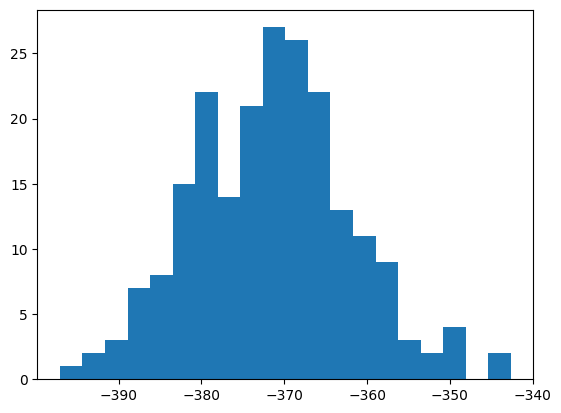

In [154]:
plt.figure()
plt.hist(vr_cas3_dg, bins=20);


In [155]:
print (np.max(vr_cas3_dg)-np.min(vr_cas3_dg))
print (np.min(vr_cas3_dg))

54.44999999999999
-397.09


In [156]:
mvr0 = -400.0
dvr0 = 25.0
logL0 = log_Likilihood(mvr0, dvr0, vr_cas3_dg)
step_mvr = 2.0
step_dvr = 1.0
nsteps = 10000

mvr_steps = [mvr0]
dvr_steps = [dvr0]
logL_steps = [logL0]

accepts = []

In [157]:
for i in range(nsteps):
    
    mvr1 = mvr0
    dvr1 = dvr0
    logL1 = logL0

    mvr1 = mvr1 + np.random.normal(0, step_mvr)
    dvr1 = dvr1 + np.random.normal(0, step_dvr)
    logL1 = log_Likilihood(mvr1, dvr1, vr_cas3_dg)

    mvr_steps.append(mvr1)
    dvr_steps.append(dvr1)
    logL_steps.append(logL1)

    if logL1 > logL0:

        mvr0 = mvr1
        dvr0 = dvr1
        logL0 = logL1
        accepts.append(1)

    else:

        a = np.random.uniform(0, 1)
        if (logL1-logL0) > np.log(a):

            mvr0 = mvr1
            dvr0 = dvr1
            logL0 = logL1
            accepts.append(1)



    

In [158]:
# calculate the acceptance rate
# Optimize the steps to get the acceptance rate around 20%
print(len(accepts)/nsteps)

0.2127


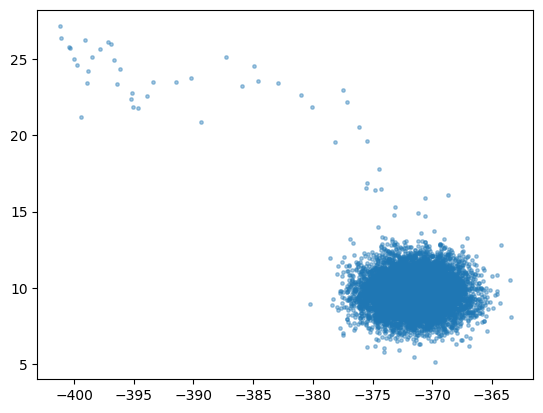

In [159]:
plt.figure()

plt.scatter(mvr_steps, dvr_steps, s=6, alpha=0.4)


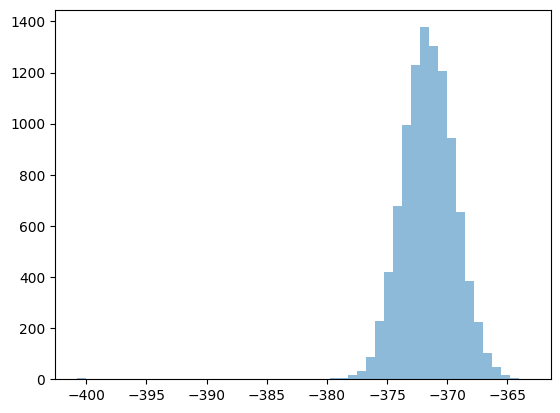

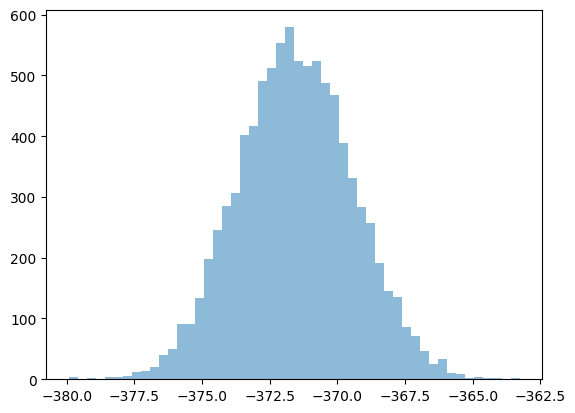

In [151]:
# The optimized step is around the disperson (sigma) of the PDF (FWHM=2.36*sigma)
# Then re-run MCMC usng the optimized steps!
plt.figure()
plt.hist(mvr_steps, bins=50, alpha=0.5, label='mvr');
plt.figure()
plt.hist(mvr_steps[int(nsteps*0.1):], bins=50, alpha=0.5, label='mvr');

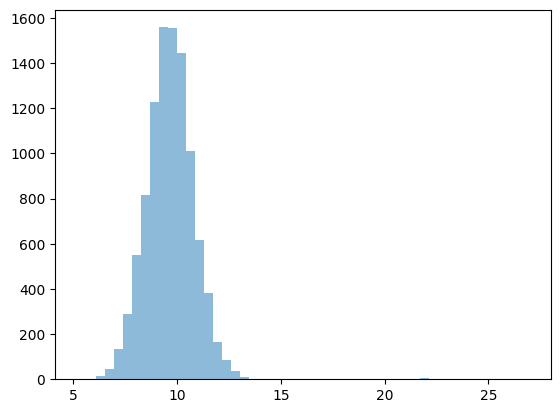

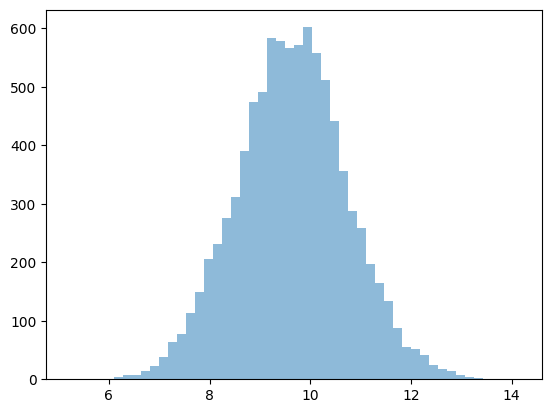

In [152]:
plt.figure()
plt.hist(dvr_steps, bins=50, alpha=0.5, label='dvr');
plt.figure()
plt.hist(dvr_steps[int(nsteps*0.1):], bins=50, alpha=0.5, label='dvr');